In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import tree
import sklearn.linear_model as LM
from sklearn import ensemble
from sklearn.datasets import make_classification,make_circles,make_regression
from sklearn.metrics import zero_one_loss,r2_score,mean_squared_error

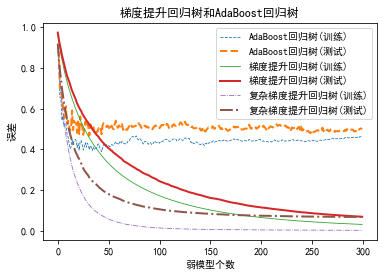

In [2]:
N=1000
X,Y=make_regression(n_samples=N,n_features=10,random_state=123)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123)

B=300
dt_stump = tree.DecisionTreeRegressor(max_depth=1, min_samples_leaf=1)
TrainErrAdaB=np.zeros((B,))
TestErrAdaB=np.zeros((B,))
adaBoost = ensemble.AdaBoostRegressor(base_estimator=dt_stump,n_estimators=B,loss= 'square',random_state=123)
adaBoost.fit(X_train,Y_train)
for b,Y_pred in enumerate(adaBoost.staged_predict(X_train)):
    TrainErrAdaB[b]=1-r2_score(Y_train,Y_pred) 
for b,Y_pred in enumerate(adaBoost.staged_predict(X_test)):
    TestErrAdaB[b]=1-r2_score(Y_test,Y_pred) 

GBRT=ensemble.GradientBoostingRegressor(loss='ls',n_estimators=B,max_depth=1,min_samples_leaf=1,random_state=123)
GBRT.fit(X_train,Y_train)
TrainErrGBRT=np.zeros((B,))
TestErrGBRT=np.zeros((B,))
for b,Y_pred in enumerate(GBRT.staged_predict(X_train)):
    TrainErrGBRT[b]=1-r2_score(Y_train,Y_pred)
for b,Y_pred in enumerate(GBRT.staged_predict(X_test)):
    TestErrGBRT[b]=1-r2_score(Y_test,Y_pred) 

GBRT0=ensemble.GradientBoostingRegressor(loss='ls',n_estimators=B,max_depth=3,min_samples_leaf=1,random_state=123)
GBRT0.fit(X_train,Y_train)
TrainErrGBRT0=np.zeros((B,))
TestErrGBRT0=np.zeros((B,))
for b,Y_pred in enumerate(GBRT0.staged_predict(X_train)):
    TrainErrGBRT0[b]=1-r2_score(Y_train,Y_pred) 
for b,Y_pred in enumerate(GBRT0.staged_predict(X_test)):
    TestErrGBRT0[b]=1-r2_score(Y_test,Y_pred) 

plt.plot(np.arange(B),TrainErrAdaB,linestyle='--',label="AdaBoost回归树(训练)",linewidth=0.8)
plt.plot(np.arange(B),TestErrAdaB,linestyle='--',label="AdaBoost回归树(测试)",linewidth=2)
plt.plot(np.arange(B),TrainErrGBRT,linestyle='-',label="梯度提升回归树(训练)",linewidth=0.8)
plt.plot(np.arange(B),TestErrGBRT,linestyle='-',label="梯度提升回归树(测试)",linewidth=2)
plt.plot(np.arange(B),TrainErrGBRT0,linestyle='-.',label="复杂梯度提升回归树(训练)",linewidth=0.8)
plt.plot(np.arange(B),TestErrGBRT0,linestyle='-.',label="复杂梯度提升回归树(测试)",linewidth=2)
plt.title("梯度提升回归树和AdaBoost回归树")
plt.xlabel("弱模型个数")
plt.ylabel("误差")
plt.legend()


说明：基于模拟数据对比梯度提升算法和提升策略回归树的预测性能。
1、利用make_regression生成样本量等于1000，包括10个数据变量，输出变量为数值型的数据集。利用旁置法划分训练集和测试集。
2、计算迭代次数增加至300过程中，提升策略回归树和梯度提升回归树的训练误差和测试误差。两者的集成学习器相同。
3、计算迭代次数增加至300过程中，基础学习器为较复杂模型下，提升策略回归树的训练误差和测试误差。
4、对计算结果绘制折线图。图形显示，梯度提升树的误差均低于提升策略回归树，同时，基础学习器较为复杂的梯度提升树，能够在迭代次数较少时就获得较低的误差。